In [14]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

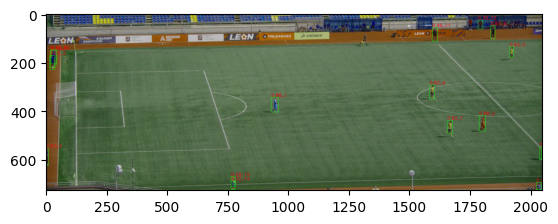

In [26]:
# Video file path
video_path = 'data/yantar-230722-02-det.mp4'

# Open the video file as a context manager
with imageio.get_reader(video_path) as video:
    # Read the first frame
    first_frame = video.get_data(0)

# Display the first frame using matplotlib
plt.imshow(first_frame)
plt.show()

# Save the first frame as an image using Matplotlib
plt.imsave('test.png', first_frame)

60;152
47;724
1620;125
2139;668

In [16]:
track_df = pd.read_csv("data/yantar-230722-02_track.csv")
track_df.sample()

,frame,id,x1,y1,x2,y2,team
160932,9125,39324,4073,425,4094,535,error


In [18]:
import cv2

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get the resolution (width and height) of the video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Release the video capture object
cap.release()

# Print the resolution
print(f"Video Resolution: {width} x {height}")

Video Resolution: 2048 x 726


In [22]:
track_df.head()

,frame,id,x1,y1,x2,y2,team
0,1,1,1860,686,1917,808,error
1,1,2,3577,837,3630,967,error
2,1,3,30,342,70,458,error
3,1,4,0,1104,19,1249,error
4,1,5,3828,269,3861,357,error


In [ ]:
def downscale_df(df, ratio=2):
    df["x1"] = df["x1"] / 2
    df["x2"] = df["x2"] / 2
    df["y1"] = df["y1"] / 2
    df["y2"] = df["y2"] / 2

    

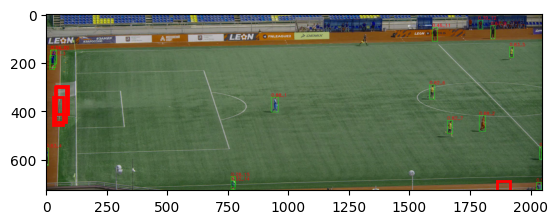

In [40]:
df =  track_df[track_df["frame"]==1]

# Display the first frame using matplotlib
plt.imshow(first_frame)

# Draw bounding boxes on the image
for index, row in df.iterrows():
    x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

# Save the image with bounding boxes
plt.savefig('output_with_boxes.png')

# Show the image
plt.show()

In [44]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

track_df.describe()

,frame,id,x1,y1,x2,y2
count,1386505,1386505,1386505,1386505,1386505,1386505
mean,36888,194405,2509,545,2554,656
std,20431,118155,1146,362,1147,364
min,1,1,0,0,12,74
25%,20257,90811,1604,254,1651,358
50%,38409,200863,2751,516,2795,630
75%,53750,295639,3510,709,3552,833
max,71995,400405,4081,1419,4096,1452
